In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from clean import MissingFiller, cont_columns
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import umap
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
data = pd.read_csv('Automobile_data.csv')
data = data[data.price != '?']
data = MissingFiller().fit_transform(data, _)
data['price'] = data['price'].astype('float')

## Fig 1: Horsepower, price and risk

1. There is a big correlation between the horsepower and price of a car; 
2. Neither is very predictive of risk. Some very expensive cars are deemed very risky. 

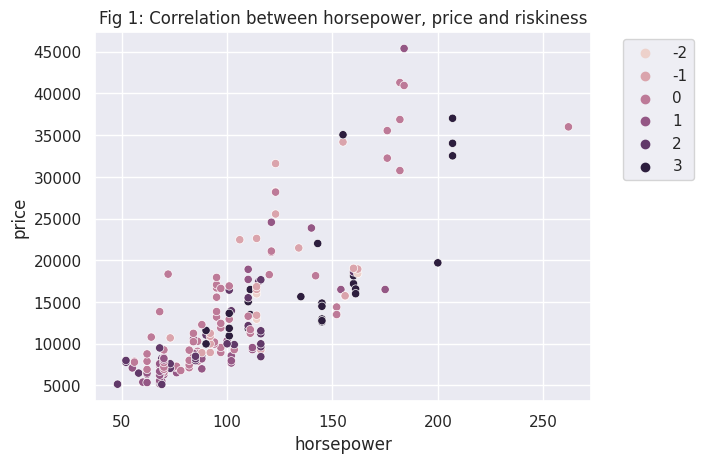

In [117]:
sns.scatterplot(data, x='horsepower', y='price', hue='symboling')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Fig 1: Correlation between horsepower, price and riskiness')
plt.show()

## Fig 2: scatterplots of important features

3. The more expensive a car, the more variance in it's features, for basically any feature. 
4. Horsepower, length and highway-mpg are very predictive of price (and of each other)
5. Height is not predictive to neither price, nor the other three. 

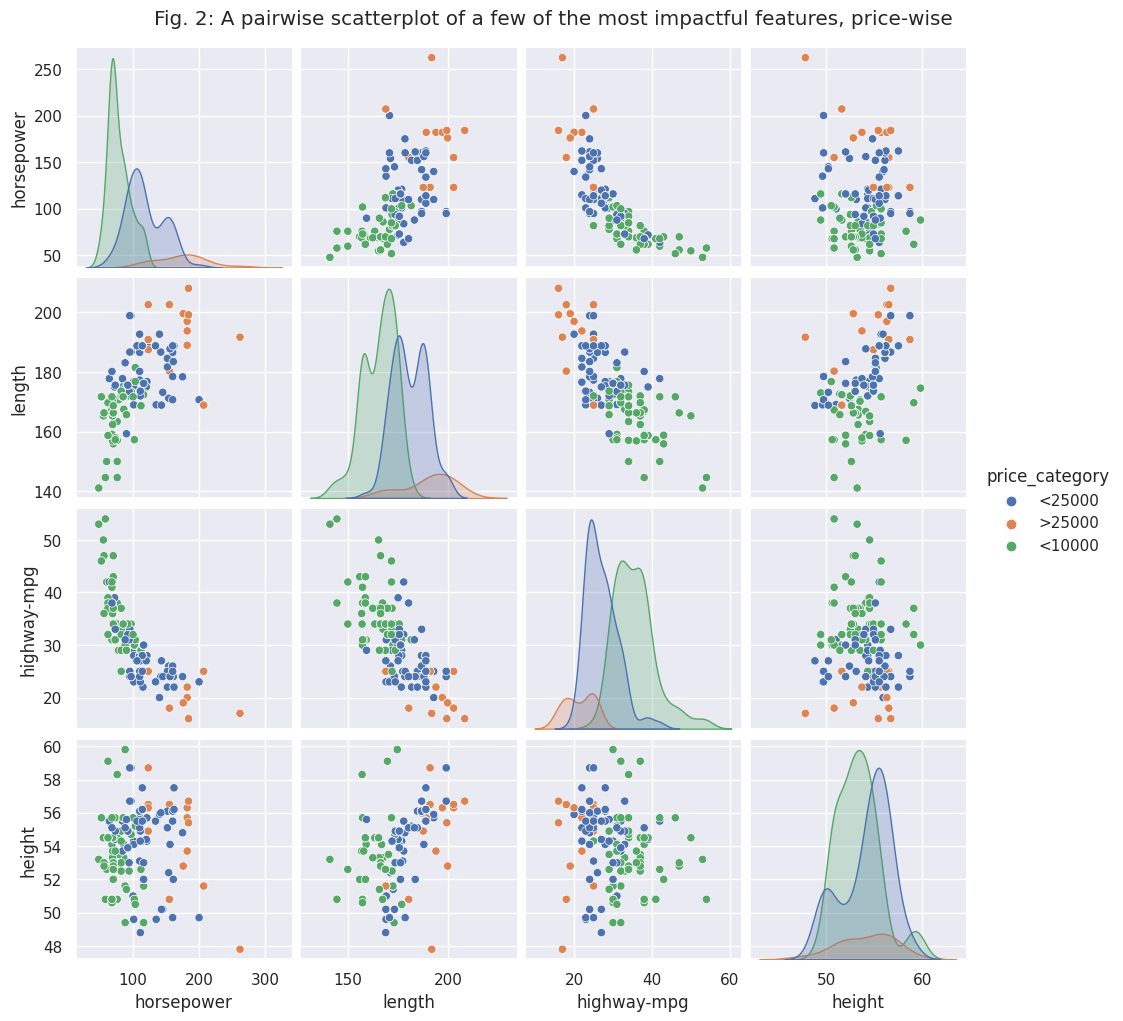

In [116]:
def price_category(price):
    if price < 10_000: return '<10000'
    if price < 25_000: return '<25000'
    return '>25000'

dimension_columns = ['wheel-base', 'length', 'height', 'curb-weight']
engine_cols = ['horsepower', 'engine-size', 'bore', 'stroke', 'peak-rpm']
vanity_cols = ['horsepower', 'length', 'highway-mpg', 'height']

data['price_category'] = data.price.apply(price_category)
g = sns.pairplot(data[vanity_cols + ['price_category']], 
             hue='price_category')
g.fig.suptitle('Fig. 2: A pairwise scatterplot of a few of the most impactful features, price-wise', y=1.02)
plt.show()

## Fig 3: Clusters of brands?
6. Using only the continuous features, averaging by make, we can see three clusters forming:
    * the expensive ones
    * the japanese cars
    * the mid-rangers. 


While UMAP is only preserving local structure, and the final look of the plot varies wildly with hyperparameters and random seed, these clusters seem pretty stable. This might work better if we had more data. 

/home/hristo/miniconda3/envs/cv38/lib/python3.8/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


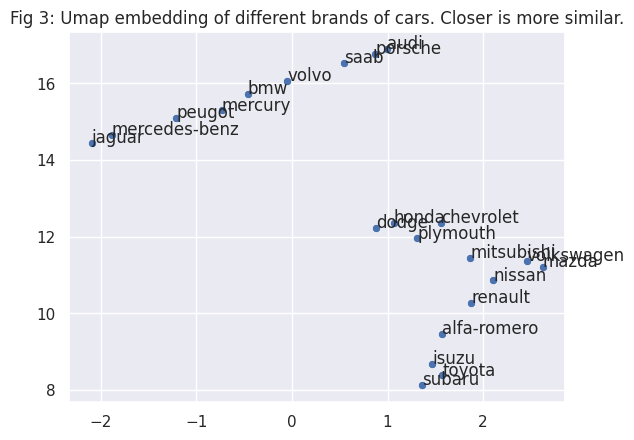

In [111]:
make_average_dimensions = data[cont_columns + ['make']].groupby('make').mean()
# Use UMAP to reduce the dimensionality
reducer = umap.UMAP(n_neighbors=3, n_components=2, random_state=42)
embedding = reducer.fit_transform(make_average_dimensions)

sns.scatterplot(x=embedding[:, 0], y=embedding[:, 1])
# Add labels to the points
for i, label in enumerate(make_average_dimensions.index):
    plt.text(embedding[i,0], embedding[i,1], label, ha='left')
plt.title('Fig 3: Umap embedding of different brands of cars. Closer is more similar.')
plt.show()